# Summary

K-Means clustering from Scikit-Learn was utilized to identify the patterns of 200 customers at a mall. The customer dataset consisted of gender, age, annual income, and spending score. The goal was to extract some insights of the mall's customers.

The model determined clusters of customers some of which could be targeted with advertisements or deals.

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
#Import the dataset
dataset = pd.read_csv('Mall_Customers.csv') 
X = dataset.iloc[:,1:].values

In [3]:
#Using label encoder for the gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [4]:
#Take a look at the first five customers
X[:5]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

# Building the model

## Determining the optimal number of clusters

Text(0, 0.5, 'WCSS')

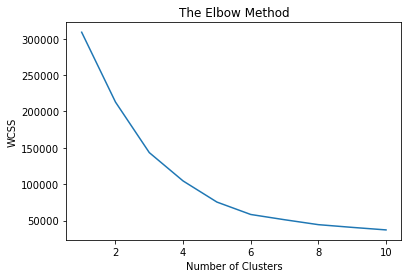

In [5]:
#Use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(np.arange(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Based on the graph above, the optimal number of clusters to use is 5

## Training the K-means model with the optimal number of clusters

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
#Cluster each feature (customer) is assigned to
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

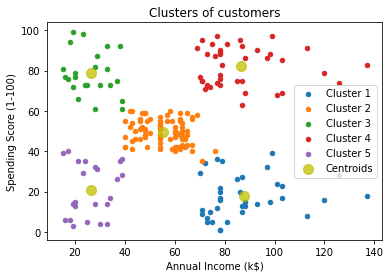

In [8]:
#Visualizing the results
#Column to visualize
col = 2
col_dict = {0:'Gender', 1:'Age', 2:'Annual Income (k$)', 3:'Spending Score (1-100)'}
for i in range(0, kmeans.n_clusters):
    plt.scatter(X[y_kmeans == i, col], X[y_kmeans == i, 3], s = 20, label = 'Cluster %s' % str(i+1))
plt.scatter(kmeans.cluster_centers_[:, col], kmeans.cluster_centers_[:, 3], s = 100, c = 'y', label = 'Centroids', alpha=0.75)
plt.title('Clusters of customers')
plt.xlabel(col_dict[col])
plt.ylabel(col_dict[3])
plt.legend()